In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
#seaborn matplotlib üzerine kurulmuş daha gelişmiş bi grafik kütüphanesi

In [48]:
df=pd.read_excel("bisiklet_fiyatlari.xlsx")

In [49]:
df.head(8)
#default olarak ilk 5 veriyi alır

,Fiyat,BisikletOzellik1,BisikletOzellik2
0,807.673876,1749.628226,1749.590668
1,959.227520,1748.007826,1751.824206
2,718.020033,1750.122967,1747.977026
3,945.668885,1749.916440,1750.771646
4,955.542968,1750.780519,1750.592430
5,950.221425,1749.463071,1751.099011
6,972.099912,1750.482746,1750.778662
7,730.747018,1750.724858,1748.037351


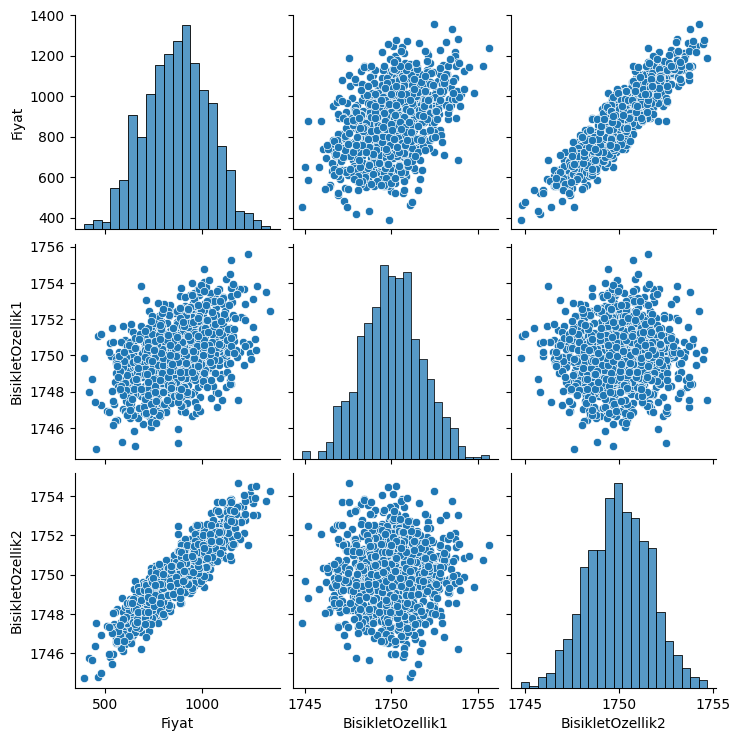

In [50]:
sbn.pairplot(df)

In [51]:
#veriyi train ve test olarak ayırmak
from sklearn.model_selection import train_test_split

In [52]:
df
#fiyat=label, özellik kısımları da=features oluyor
#  y=wx + b

,Fiyat,BisikletOzellik1,BisikletOzellik2
0,807.673876,1749.628226,1749.590668
1,959.227520,1748.007826,1751.824206
2,718.020033,1750.122967,1747.977026
3,945.668885,1749.916440,1750.771646
4,955.542968,1750.780519,1750.592430
...,...,...,...
995,833.920637,1750.033229,1749.427281
996,800.298076,1747.996913,1750.035046
997,799.261737,1752.540381,1747.983310
998,705.802257,1751.349290,1747.484989


In [53]:
#df nin Fiyat sütununu diziye çevirelim
#yapay zeka ile tahmin ettirmeye calistigimiz gercek degerler bunlar

y=df["Fiyat"].values
y


array([ 807.6738764,  959.2275201,  718.0200329,  945.6688847,
        955.5429676,  950.2214253,  972.0999123,  730.7470179,
        653.0064296, 1108.363012 , 1092.432411 ,  831.9017301,
       1050.644778 ,  932.4576656,  827.4618849,  886.0465092,
        889.7252105, 1068.296866 ,  566.4010835,  780.8715318,
        633.7147302,  758.4686205,  983.5045088, 1115.291836 ,
        914.9140132,  822.1549425,  950.4423736,  989.5097974,
        927.5574942, 1068.515289 ,  844.4737208,  573.2300709,
       1014.528968 ,  784.7521757, 1100.709911 ,  939.3954013,
        997.617767 ,  626.1947566, 1071.148623 ,  778.1894898,
       1050.207614 ,  916.1829736,  897.6624037, 1076.042305 ,
        707.6178069, 1126.454907 ,  855.674057 ,  775.6082   ,
        900.3383662,  901.043046 ,  568.8524138,  970.6586024,
        789.93495  , 1028.438035 ,  836.0406201, 1005.402312 ,
        960.5938984,  925.2090462,  775.6192584,  696.2936631,
        622.6418664,  806.2158674,  935.842904 ,  940.8

In [54]:
#geri kalan sütunları x adı altında toplayalım

x=df[["BisikletOzellik1","BisikletOzellik2"]].values
x

array([[1749.628226, 1749.590668],
       [1748.007826, 1751.824206],
       [1750.122967, 1747.977026],
       ...,
       [1752.540381, 1747.98331 ],
       [1751.34929 , 1747.484989],
       [1748.656426, 1752.539962]])

In [55]:
#simdi az önce sklearn.model_selection dan getirdiğimiz train_test_split fonk kullanma zamani

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=15)
#test_size burada test in train+test e oranı

In [56]:
x_train.shape

(670, 2)

In [57]:
x_test.shape

(330, 2)

In [58]:
y_train.shape

(670,)

In [59]:
y_test.shape

(330,)

In [60]:
#scaling
#nöronlara vereceğimiz dataset i küçülteceğiz
#yukarida gördüğümüz degerler gercekten cok büyük sayilar

from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

scaler.fit(x_train)

MinMaxScaler()

In [61]:
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

In [62]:
x_train
#veri kücüldü

array([[0.3177906 , 0.64341466],
       [0.61991638, 0.89583174],
       [0.53950097, 0.0980286 ],
       ...,
       [0.2352117 , 0.52644765],
       [0.7576794 , 0.19157421],
       [0.4292982 , 0.16530301]])

In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

#hidden layerlar içinde kaç nöron olacağını dense ile belirleriz

model=Sequential()
#üstteki hidden layerda 2 tane nöron var(2 tane feature ımız var zaten)
model.add(Dense(4,activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(4,activation="relu"))
model.add(Dense(4,activation="relu"))

#output katmanı ekleyelim
model.add(Dense(1))
#optimizer algo yazdık,mean squared error
model.compile(optimizer="rmsprop",loss="mse")

In [64]:
model.fit(x_train,y_train,epochs=250)

Epoch 1/250


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 950us/step - loss: 781331.0625
Epoch 2/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 753us/step - loss: 804707.9375
Epoch 3/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 813965.0000 
Epoch 4/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 797693.7500 
Epoch 5/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 799409.3125 
Epoch 6/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 789051.2500 
Epoch 7/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 835us/step - loss: 788000.1250
Epoch 8/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 797816.0000 
Epoch 9/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step - loss: 799579.3750
Epoch 10/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step - loss: 776799.9375
Epoch 11/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 858us/step - loss: 787294.3750
Epoch 12/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 790556.2500 
Epoch 13/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 798411.8125 
Epoch 14/250
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step - loss: 8025

In [65]:
loss=model.history.history["loss"]
#model.history.history direkt sözlük olarak basıyor ekrana
#bir üstteki gibi yaparsak list olarak basar
#veya direkt df=pd.dataframe(model.history.history) de diyebiliriz zaten en sonunda df yapacağız

<Axes: >

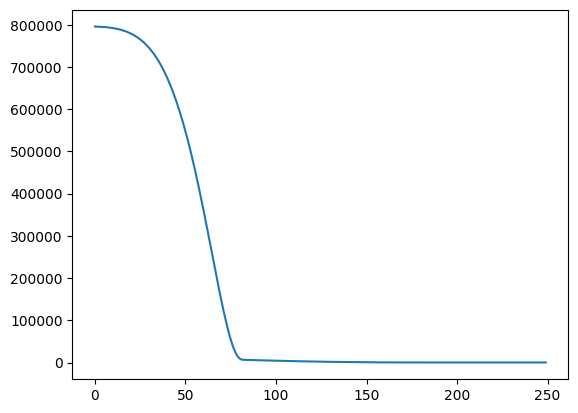

In [66]:
sbn.lineplot(x=range(len(loss)),y=loss)

In [67]:
trainLoss=model.evaluate(x_train,y_train,verbose=0)
#default olarak verbose=1 gelir

testLoss=model.evaluate(x_test,y_test,verbose=0)
#daha dusuk kayip degeri daha iyi model performansi demektir

In [68]:
trainLoss

73.68358612060547

In [69]:
testLoss

75.40931701660156

In [70]:
testPredictions=model.predict(x_test)
testPredictions
# #mesela burda x_test i verdiğimde bana bisikletler şu fiyattan satılabilir dedi benim gercek fiyatım ise y test

 1/11 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


array([[1078.8234 ],
       [ 624.21594],
       [ 876.852  ],
       [ 894.9912 ],
       [ 900.2594 ],
       [ 451.68176],
       [ 931.95557],
       [ 992.33203],
       [ 942.032  ],
       [1017.7175 ],
       [ 751.5042 ],
       [ 918.6676 ],
       [ 948.343  ],
       [1055.6932 ],
       [1122.5447 ],
       [ 682.03925],
       [1128.0695 ],
       [ 651.3656 ],
       [1155.7338 ],
       [ 887.29645],
       [ 893.5807 ],
       [ 717.30115],
       [ 457.01865],
       [ 612.402  ],
       [ 835.68774],
       [1092.2532 ],
       [ 714.2964 ],
       [ 757.4635 ],
       [ 874.2115 ],
       [ 771.21674],
       [ 451.4322 ],
       [ 783.6713 ],
       [ 728.8208 ],
       [ 647.23486],
       [ 887.4863 ],
       [ 844.4971 ],
       [1036.7018 ],
       [1023.75543],
       [ 845.6268 ],
       [ 862.9434 ],
       [ 757.7198 ],
       [1175.7513 ],
       [1098.6685 ],
       [1088.8622 ],
       [ 873.90546],
       [ 596.9769 ],
       [1146.8807 ],
       [ 974.

In [71]:
prediction=pd.DataFrame(y_test,columns=["real y"])
prediction

,real y
0,1081.652164
1,622.675990
2,889.356810
3,902.826733
4,897.662404
...,...
325,1028.438035
326,789.934950
327,758.490486
328,1172.871659


In [72]:
testPredictions=pd.Series(testPredictions.reshape(330,))
#indexi yokmuş gibi 329 gibi konumlandırabilmek icin reshape ettik

In [73]:
testPredictions_series=pd.Series(testPredictions)

In [74]:
prediction=pd.concat([prediction,testPredictions],axis=1)
#yapay zekanın tahminini yazığımız df ile gerçek değerleri birleştirdik
#pd concat genelde df birleştirmede falan kullanılır
#axis=1 demek sütunlar boyunca birleştirilecek demek
prediction


,real y,0
0,1081.652164,1078.823364
1,622.675990,624.215942
2,889.356810,876.851990
3,902.826733,894.991211
4,897.662404,900.259399
...,...,...
325,1028.438035,1014.495178
326,789.934950,791.435303
327,758.490486,766.551941
328,1172.871659,1168.746704


In [75]:
prediction.columns=["real y","predicted y"]
prediction

,real y,predicted y
0,1081.652164,1078.823364
1,622.675990,624.215942
2,889.356810,876.851990
3,902.826733,894.991211
4,897.662404,900.259399
...,...,...
325,1028.438035,1014.495178
326,789.934950,791.435303
327,758.490486,766.551941
328,1172.871659,1168.746704


<Axes: xlabel='real y', ylabel='predicted y'>

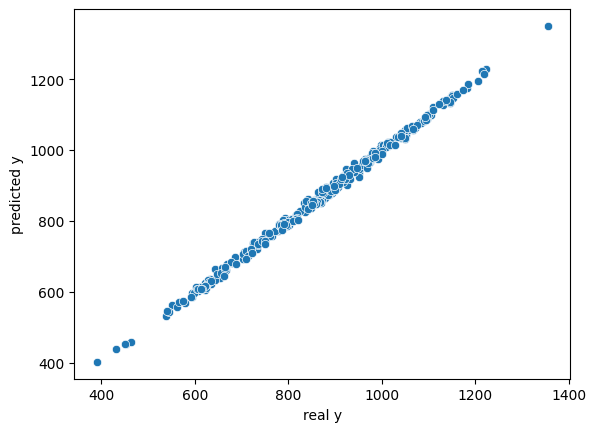

In [76]:
sbn.scatterplot(x="real y",y="predicted y",data=prediction)

In [77]:
from sklearn.metrics import mean_absolute_error,mean_squared_error


In [78]:
mean_absolute_error(prediction["real y"],prediction["predicted y"])

6.909843711737686

In [79]:
mean_squared_error(prediction["real y"],prediction["predicted y"])

74.50549996109842

In [80]:
df.describe()
#ortalaması 872 olan bi fiyatta absolute error sonucu kadar saparsak bişey olmaz

,Fiyat,BisikletOzellik1,BisikletOzellik2
count,1000.000000,1000.000000,1000.000000
mean,872.677801,1750.024800,1749.964733
std,164.124504,1.704531,1.659578
min,390.856887,1744.852108,1744.742389
25%,757.795031,1748.831119,1748.803186
50%,879.168705,1750.017350,1750.003926
75%,988.612778,1751.115765,1751.129414
max,1355.213745,1755.613884,1754.666038


In [81]:
from tensorflow.keras.models import load_model

In [82]:
model.save("bisiklet_fiyatlari.h5")

In [83]:
loadedModel=load_model("bisiklet_fiyatlari.h5")

TypeError: Could not locate function 'mse'. Make sure custom classes are decorated with `@keras.saving.register_keras_serializable()`. Full object config: {'module': 'keras.metrics', 'class_name': 'function', 'config': 'mse', 'registered_name': 'mse'}